Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/ping_pong/'

NMSG = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 12:23:17 2025 +0100) (509.77ms ela...,0.366,0.0257,0.454,1.01,0.17,11.89,51.38 C,Nominal
1,(Wed Mar 26 12:23:18 2025 +0100) (508.61ms ela...,1.390,0.0521,0.525,2.01,0.40,29.94,51.06 C,Nominal
2,(Wed Mar 26 12:23:18 2025 +0100) (508.60ms ela...,0.271,0.0272,0.412,0.78,0.17,12.16,51.06 C,Nominal
3,(Wed Mar 26 12:23:19 2025 +0100) (508.82ms ela...,0.279,0.0236,0.411,0.78,0.19,13.04,50.64 C,Nominal
4,(Wed Mar 26 12:23:19 2025 +0100) (508.43ms ela...,1.050,0.0274,0.458,1.62,0.35,25.71,50.64 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(1550, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 12:23:29 2025 +0100) (1008.79ms el...,33.7,0.0434,0.778,34.65,3.79,97.67,52.80 C,Nominal
1,(Wed Mar 26 12:23:30 2025 +0100) (1004.94ms el...,34.2,0.0223,0.497,35.04,3.87,99.24,56.62 C,Nominal
2,(Wed Mar 26 12:23:31 2025 +0100) (1006.31ms el...,33.4,0.0283,0.809,34.46,3.88,98.25,59.35 C,Nominal
3,(Wed Mar 26 12:23:32 2025 +0100) (1004.81ms el...,32.8,0.0222,0.488,33.59,3.78,99.42,61.36 C,Nominal
4,(Wed Mar 26 12:23:33 2025 +0100) (1004.85ms el...,33.2,0.0191,0.480,34.08,3.77,98.67,63.01 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 12:57:25 2025 +0100) (510.78ms ela...,0.1990,0.00000,0.241,0.28,0.04,2.79,42.02 C,Nominal
1,(Wed Mar 26 12:57:26 2025 +0100) (509.29ms ela...,0.1130,0.03300,0.387,0.22,0.06,4.06,42.02 C,Nominal
2,(Wed Mar 26 12:57:26 2025 +0100) (508.36ms ela...,1.1700,0.00000,0.286,1.27,0.17,15.12,43.43 C,Nominal
3,(Wed Mar 26 12:57:27 2025 +0100) (508.20ms ela...,1.9400,0.00576,0.526,2.16,0.32,21.78,43.71 C,Nominal
4,(Wed Mar 26 12:57:27 2025 +0100) (509.41ms ela...,0.0711,0.00000,0.251,0.12,0.04,2.73,43.71 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(726, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Wed Mar 26 12:57:37 2025 +0100) (1009.96ms el...,13.1,0.00308,0.324,13.56,1.11,98.89,46.70 C,Nominal
1,(Wed Mar 26 12:57:38 2025 +0100) (1007.48ms el...,12.4,0.00000,0.260,12.87,1.02,99.53,50.13 C,Nominal
2,(Wed Mar 26 12:57:39 2025 +0100) (1007.79ms el...,13.7,0.00000,0.316,14.20,1.21,98.87,53.04 C,Nominal
3,(Wed Mar 26 12:57:40 2025 +0100) (1007.55ms el...,15.7,0.00000,0.362,16.21,1.42,99.25,55.62 C,Nominal
4,(Wed Mar 26 12:57:41 2025 +0100) (1006.91ms el...,12.3,0.00000,0.259,12.80,1.01,99.64,57.71 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 12:23:17,0.366,0.0257,0.454,1.01,0.17,11.89,51.38,Nominal,509.77
1,2025-03-26 12:23:18,1.390,0.0521,0.525,2.01,0.40,29.94,51.06,Nominal,508.61
2,2025-03-26 12:23:18,0.271,0.0272,0.412,0.78,0.17,12.16,51.06,Nominal,508.60
3,2025-03-26 12:23:19,0.279,0.0236,0.411,0.78,0.19,13.04,50.64,Nominal,508.82
4,2025-03-26 12:23:19,1.050,0.0274,0.458,1.62,0.35,25.71,50.64,Nominal,508.43


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(1550, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 12:23:29,33.7,0.0434,0.778,34.65,3.79,97.67,52.80,Nominal,1008.79
1,2025-03-26 12:23:30,34.2,0.0223,0.497,35.04,3.87,99.24,56.62,Nominal,1004.94
2,2025-03-26 12:23:31,33.4,0.0283,0.809,34.46,3.88,98.25,59.35,Nominal,1006.31
3,2025-03-26 12:23:32,32.8,0.0222,0.488,33.59,3.78,99.42,61.36,Nominal,1004.81
4,2025-03-26 12:23:33,33.2,0.0191,0.480,34.08,3.77,98.67,63.01,Nominal,1004.85


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 12:57:25,0.1990,0.00000,0.241,0.28,0.04,2.79,42.02,Nominal,510.78
1,2025-03-26 12:57:26,0.1130,0.03300,0.387,0.22,0.06,4.06,42.02,Nominal,509.29
2,2025-03-26 12:57:26,1.1700,0.00000,0.286,1.27,0.17,15.12,43.43,Nominal,508.36
3,2025-03-26 12:57:27,1.9400,0.00576,0.526,2.16,0.32,21.78,43.71,Nominal,508.20
4,2025-03-26 12:57:27,0.0711,0.00000,0.251,0.12,0.04,2.73,43.71,Nominal,509.41


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(726, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-26 12:57:37,13.1,0.00308,0.324,13.56,1.11,98.89,46.70,Nominal,1009.96
1,2025-03-26 12:57:38,12.4,0.00000,0.260,12.87,1.02,99.53,50.13,Nominal,1007.48
2,2025-03-26 12:57:39,13.7,0.00000,0.316,14.20,1.21,98.87,53.04,Nominal,1007.79
3,2025-03-26 12:57:40,15.7,0.00000,0.362,16.21,1.42,99.25,55.62,Nominal,1007.55
4,2025-03-26 12:57:41,12.3,0.00000,0.259,12.80,1.01,99.64,57.71,Nominal,1006.91


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


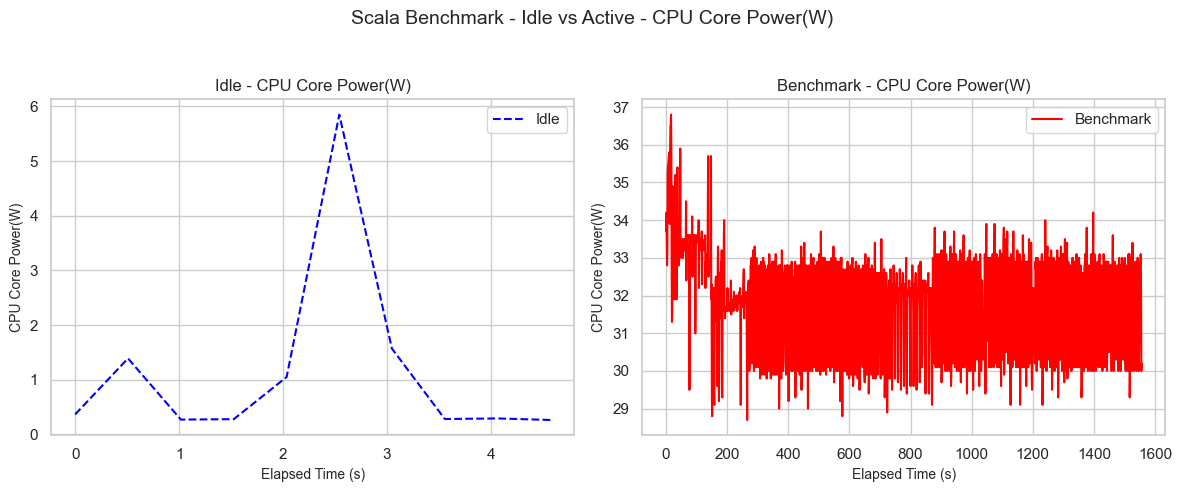

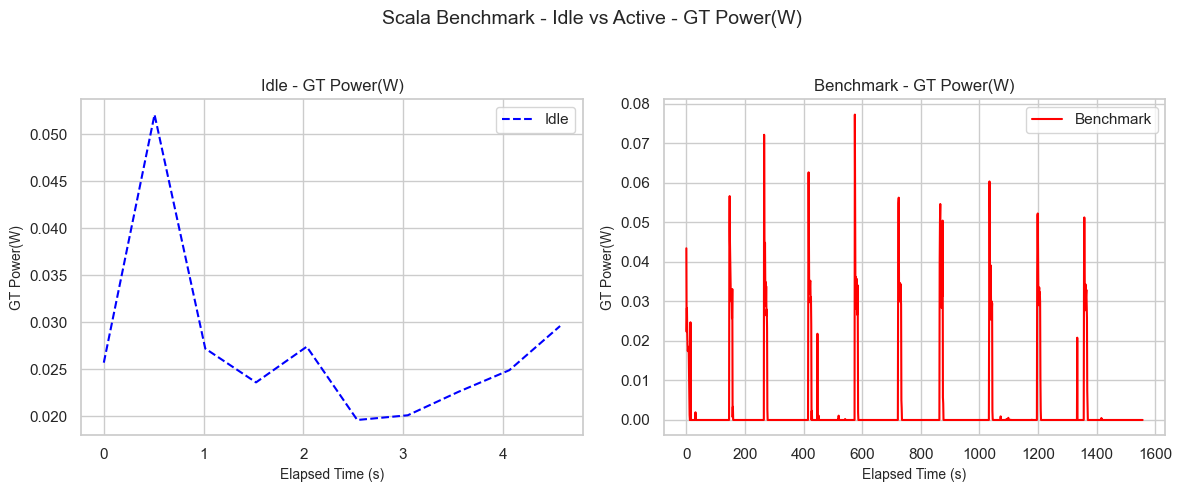

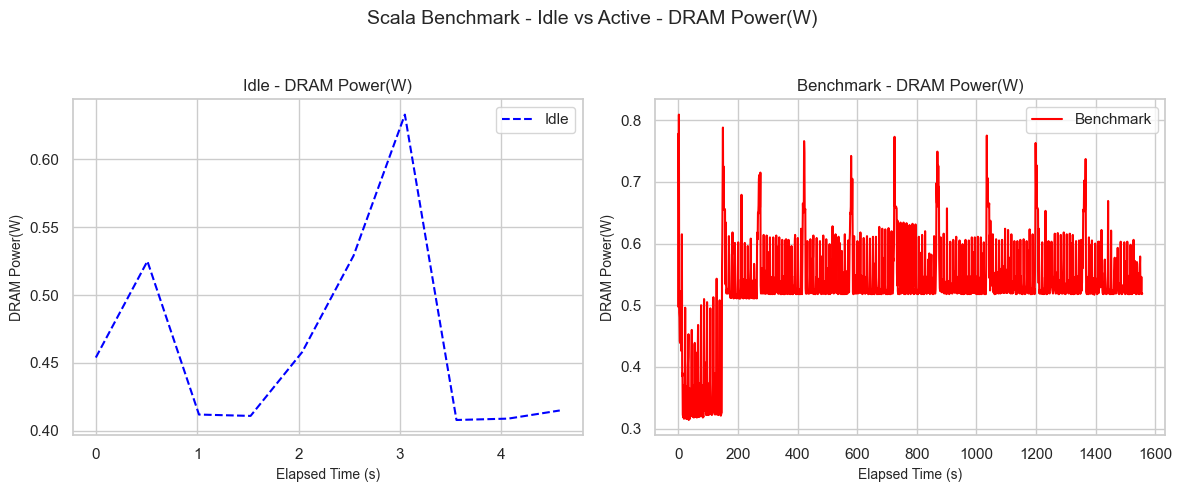

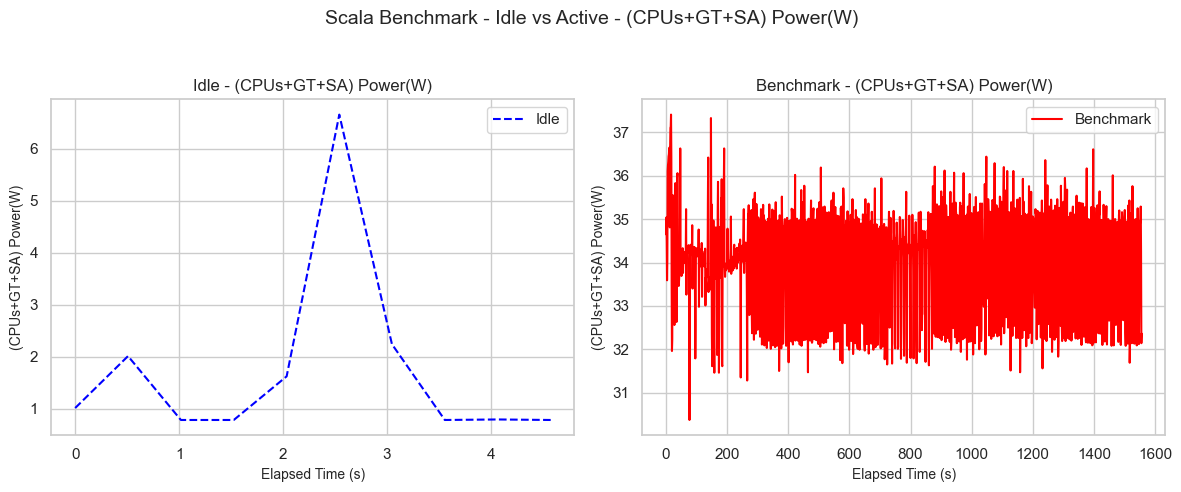

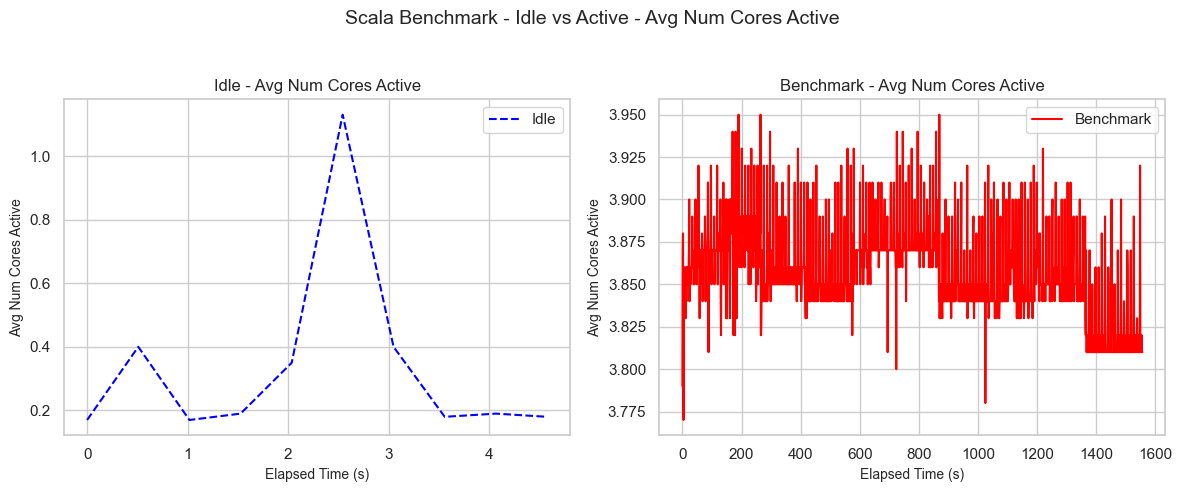

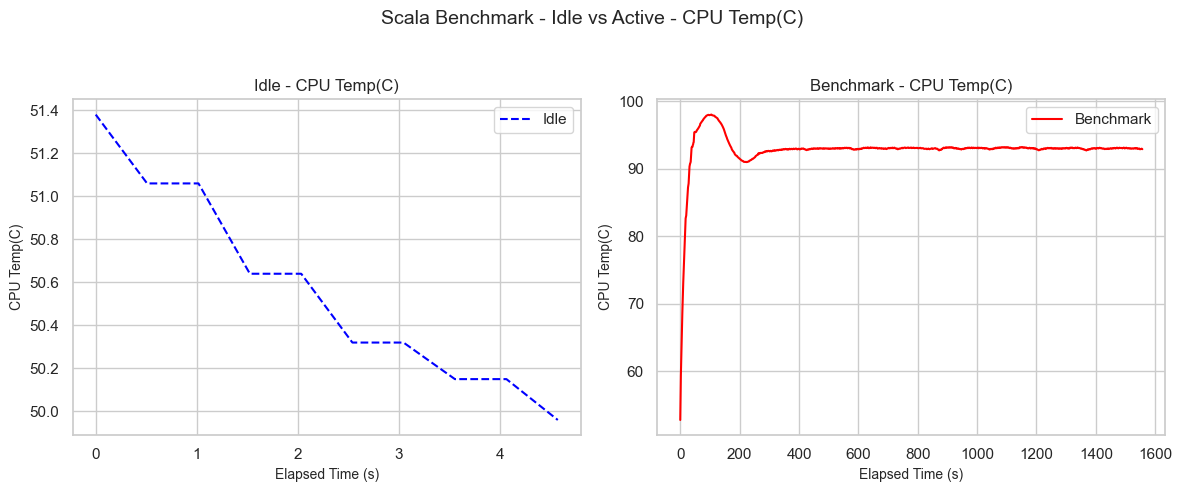

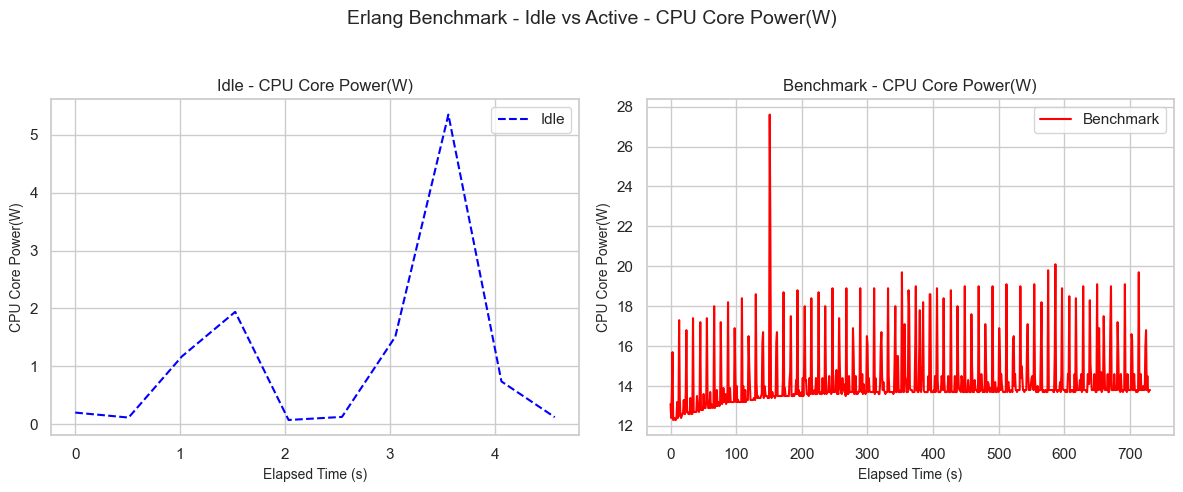

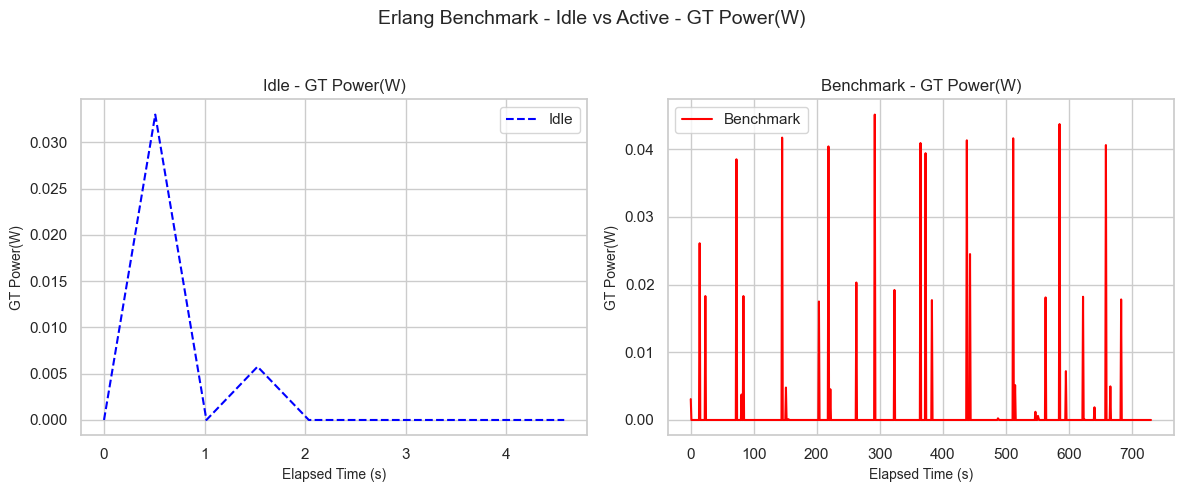

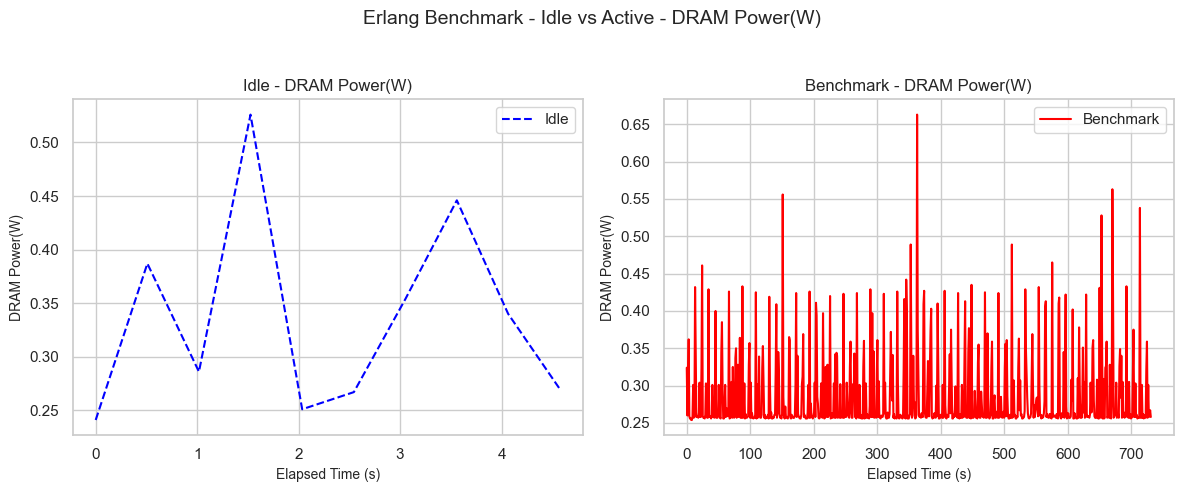

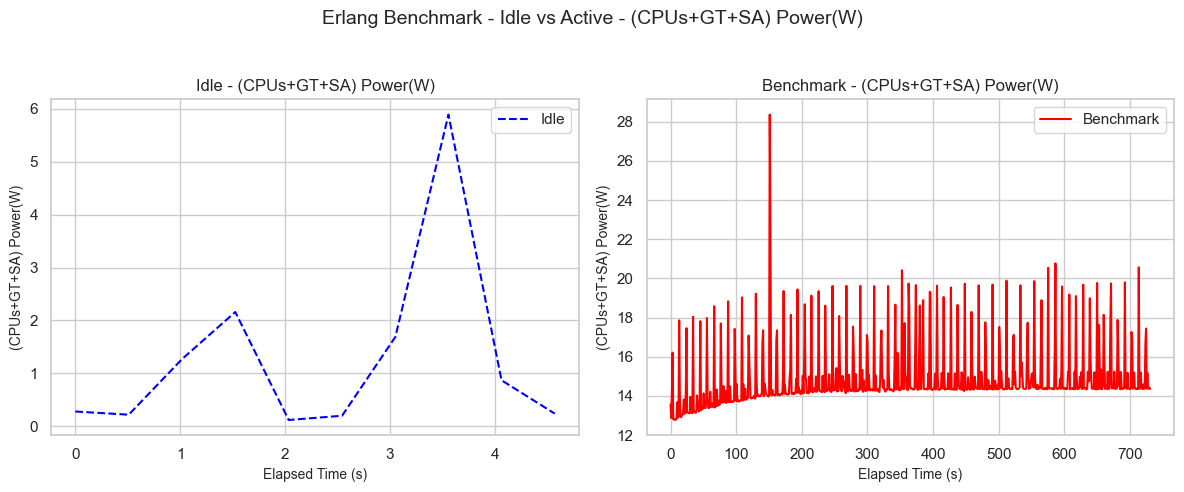

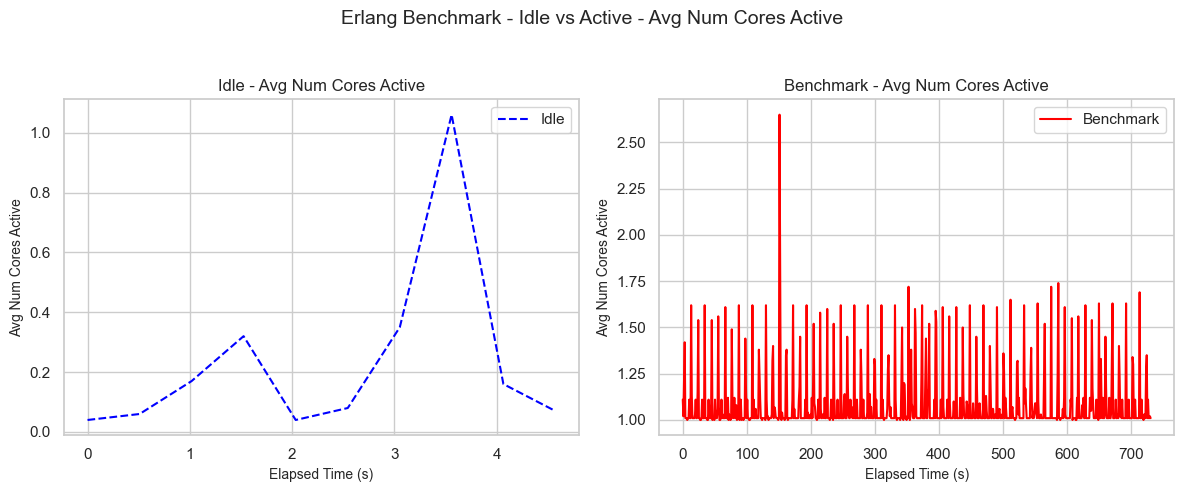

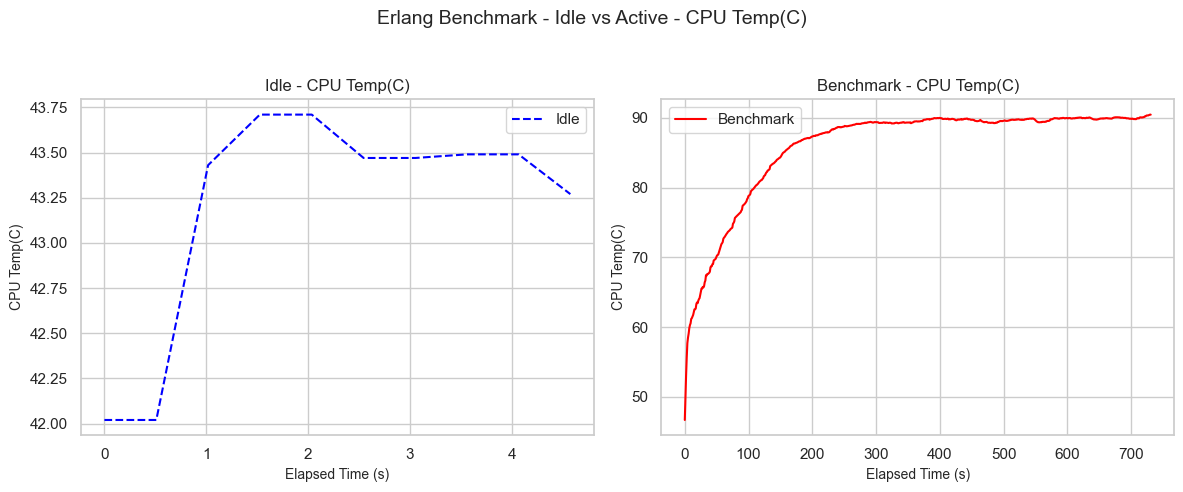

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

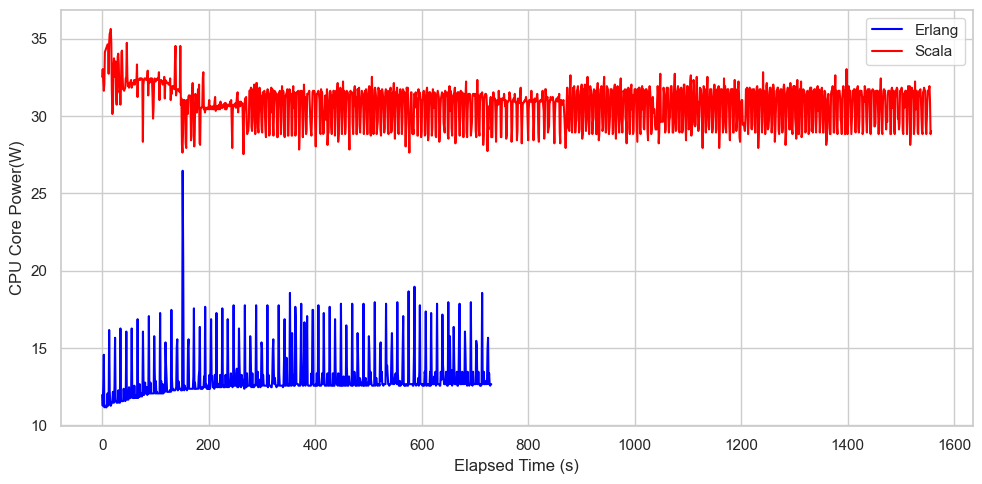

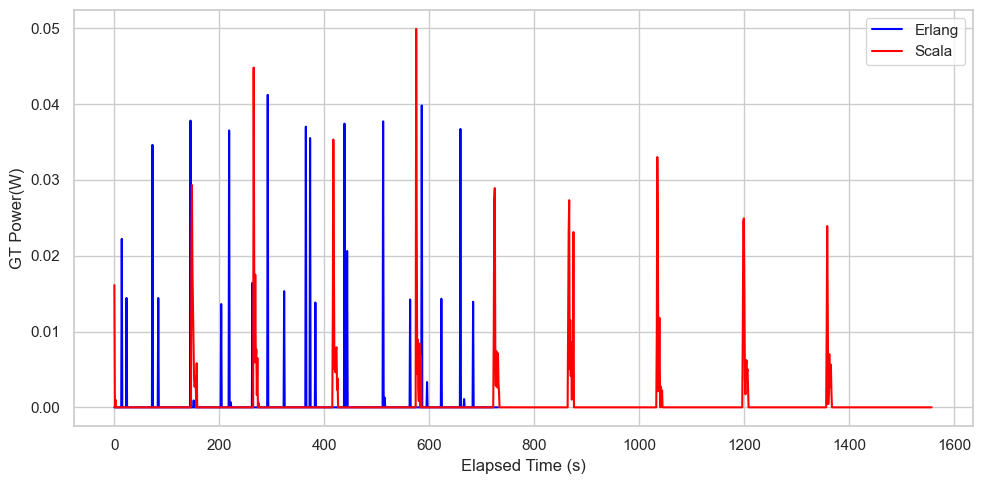

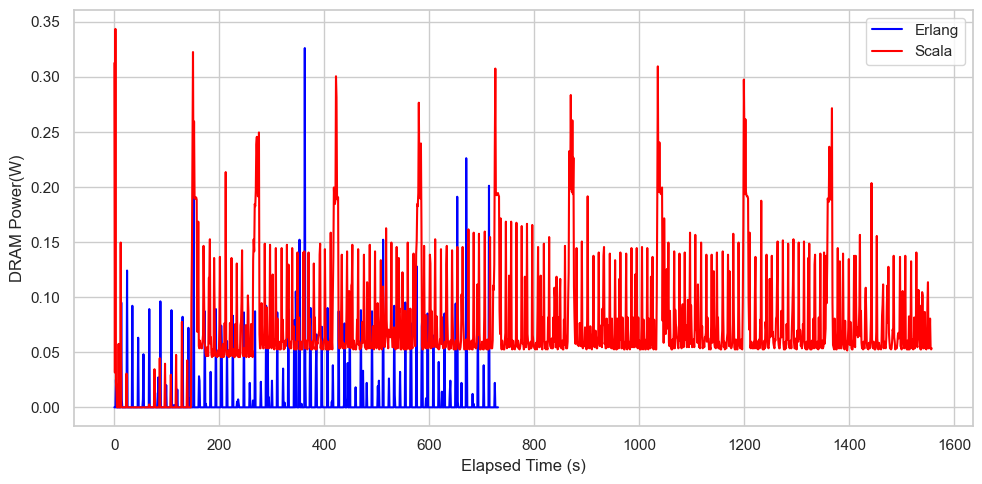

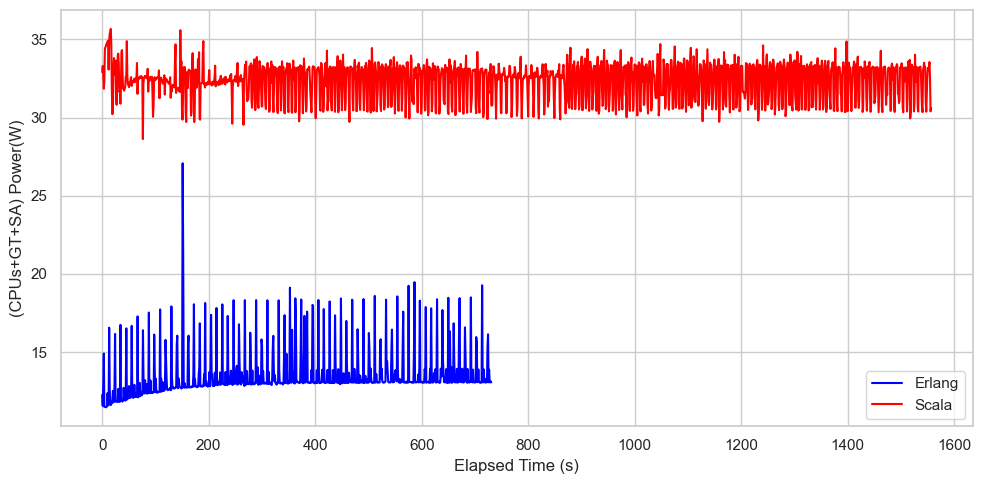

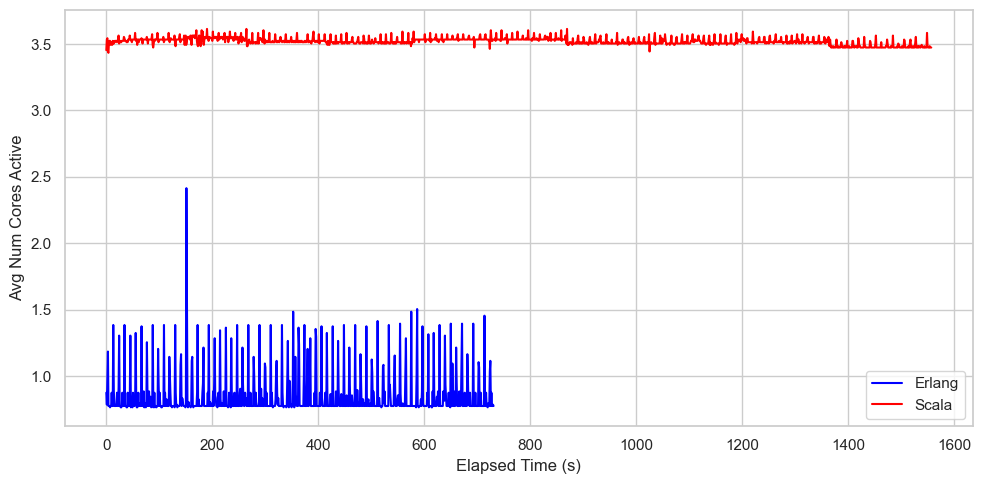

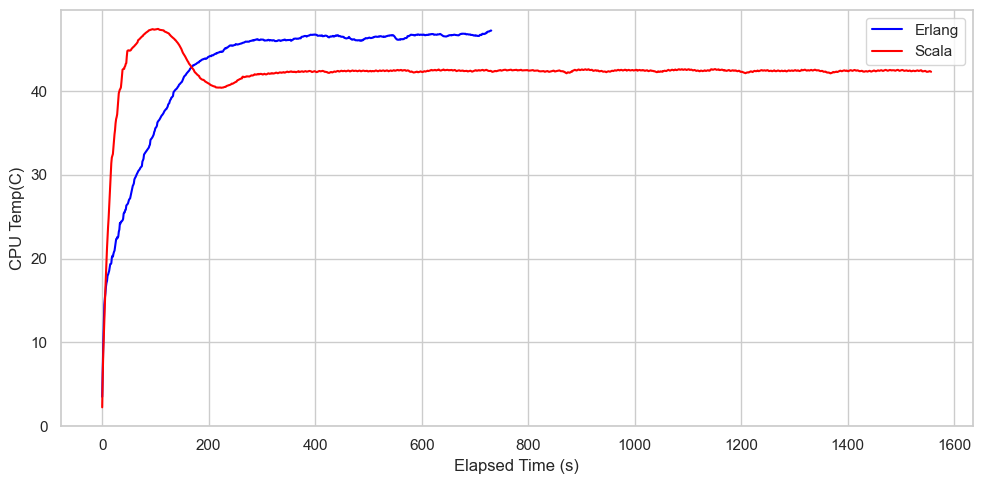

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.767310
GT Power(W)              -0.024712
DRAM Power(W)             0.063024
(CPUs+GT+SA) Power(W)    32.327303
CPU Temp(C)              42.280174
Avg Num Cores Active      3.520665
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.103229
GT Power(W)              -0.002957
DRAM Power(W)            -0.050582
(CPUs+GT+SA) Power(W)    13.550063
CPU Temp(C)              42.767826
Avg Num Cores Active      0.854311
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 48022.01628461921 Joules
Erlang Benchmark: 9550.158910143815 Joules
